# **Algoritmos: Coloreado de Grafos**

### **Marcos Damián Pool Canul** & **Oscar Manuel Ruiz Reyes**

In [72]:
import networkx as nx
import matplotlib.pyplot as plt
from random import randint, choice, random
from tabulate import tabulate

In [73]:
n_vertices = int(input("Ingrese el número de vértices: "))

In [74]:
def connected_graph(n_vertices):
    """
    Crea un gráfico conectado con n vértices.
    """
    G = nx.Graph()
    G.add_nodes_from(range(n_vertices))

    # Ensure the graph is connected
    while not nx.is_connected(G):
        v1, v2 = randint(0, n_vertices - 1), randint(0, n_vertices - 1)
        if v1 != v2:
            G.add_edge(v1, v2)

    return G

In [75]:
def initial_colors(G, colors=['red', 'green', 'blue', 'yellow']):
    """
    Asigna colores iniciales a los vértices del gráfico.
    """
    for node in G.nodes():
        G.nodes[node]['color'] = choice(colors)

    return G

In [76]:
def draw_graph(G, title):
    """
    Draw the graph with colored vertices.
    """
    plt.figure(figsize=(8, 6))
    color_map = [G.nodes[node]['color'] for node in G.nodes()]
    nx.draw(G, with_labels=True, node_color=color_map,
            node_size=500, font_size=10)
    plt.title(title)
    plt.show()

In [77]:
def create_degree_table(G, reverse_order=False):
    """
    Create a table to display each vertex and its degree.
    """
    # Sort the vertices based on degree (reverse order depends on the algorithm)
    vertices_sorted = sorted(
        G.nodes(), key=lambda x: G.degree(x), reverse=reverse_order)

    # Create a list of tuples (vertex, degree)
    vertex_degree_list = [(f"Vértice {vertex}", f"Grado {G.degree(vertex)}") for vertex in vertices_sorted]

    # Create a table using tabulate
    table = tabulate(vertex_degree_list, headers=[
                     'Vértice', 'Grado'], tablefmt='grid')
    return table

## **Algoritmo de Coloración de Welsh y Powell**

In [78]:
def welsh_powell_algorithm(G, colors=['red', 'green', 'blue', 'yellow']):
    """
    Aplique el algoritmo Welsh-Powell para colorear el gráfico.
    """
    # Ordena los vértices según el grado descendente.
    vertices_sorted = sorted(
        G.nodes(), key=lambda x: G.degree(x), reverse=True)

    for node in vertices_sorted:
        # Encuentra el primer color que no utilizan los vértices adyacentes.
        adjacent_colors = {G.nodes[neighbor]['color']
                           for neighbor in G.neighbors(node)}
        for color in colors:
            if color not in adjacent_colors:
                G.nodes[node]['color'] = color
                break

    return G

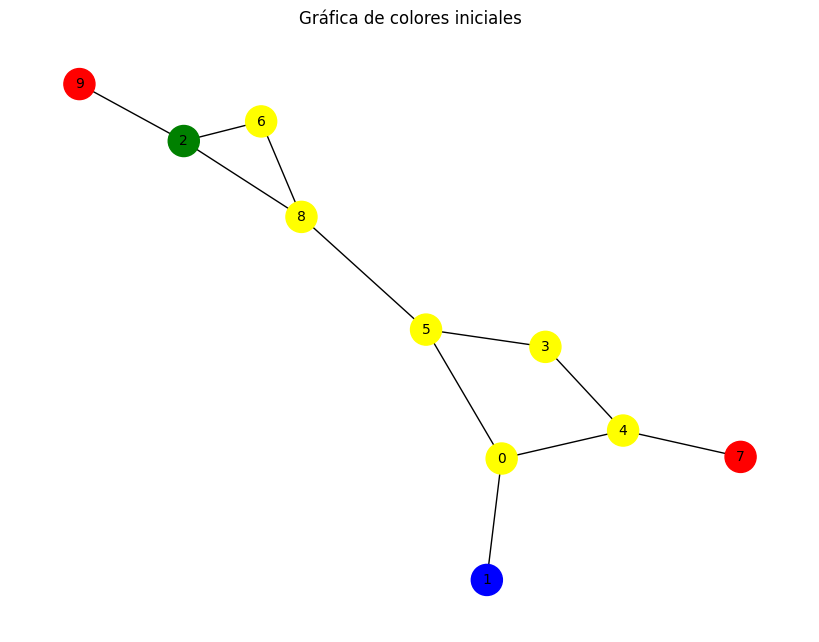

In [79]:
G = connected_graph(n_vertices)
G = initial_colors(G)
draw_graph(G, "Gráfica de colores iniciales")

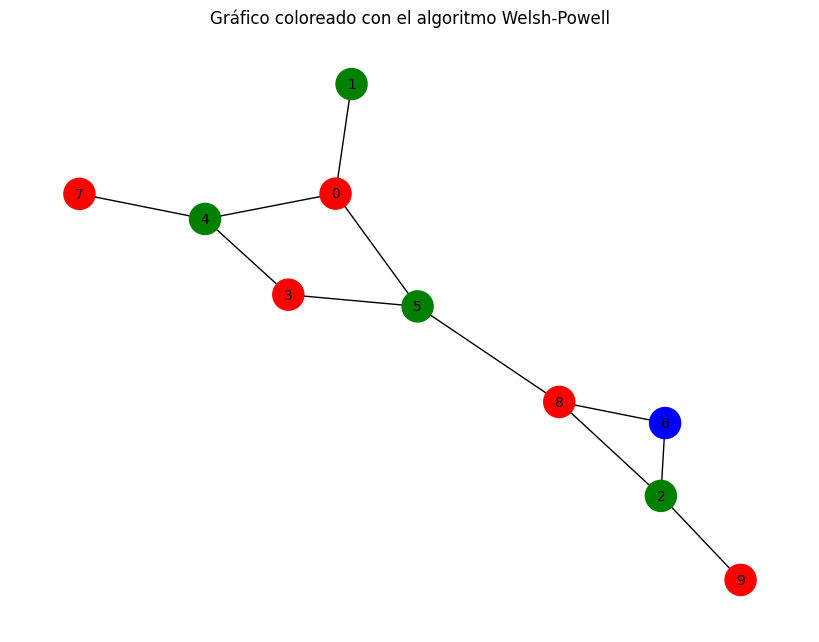

[(0, 3),
 (2, 3),
 (4, 3),
 (5, 3),
 (8, 3),
 (3, 2),
 (6, 2),
 (1, 1),
 (7, 1),
 (9, 1)]

In [80]:
# Aplicar el algoritmo de Welsh-Powell
G_colored_welsh_powell = welsh_powell_algorithm(G.copy())
draw_graph(G_colored_welsh_powell,
           "Gráfico coloreado con el algoritmo Welsh-Powell")

# Imprime el grado de cada vértice.
vertex_degrees = [(node, G.degree(node)) for node in sorted(
    G.nodes(), key=lambda x: G.degree(x), reverse=True)]
vertex_degrees

In [81]:
# Tabla 1: Grados de los vértices de la Coloración Welsh y Powell
degree_table = create_degree_table(G, reverse_order=True)
print(degree_table)

+-----------+---------+
| Vértice   | Grado   |
+===========+=========+
| Vértice 0 | Grado 3 |
+-----------+---------+
| Vértice 2 | Grado 3 |
+-----------+---------+
| Vértice 4 | Grado 3 |
+-----------+---------+
| Vértice 5 | Grado 3 |
+-----------+---------+
| Vértice 8 | Grado 3 |
+-----------+---------+
| Vértice 3 | Grado 2 |
+-----------+---------+
| Vértice 6 | Grado 2 |
+-----------+---------+
| Vértice 1 | Grado 1 |
+-----------+---------+
| Vértice 7 | Grado 1 |
+-----------+---------+
| Vértice 9 | Grado 1 |
+-----------+---------+


## **Algoritmo de Coloración de Matula, Marble, Isaacson**

In [82]:
def matula_marble_isaacson_algorithm(G, colors=['red', 'green', 'blue', 'yellow']):
    """
    Apply Matula-Marble-Isaacson algorithm to color the graph.
    This algorithm sorts the vertices in ascending order of degree and then colors them.
    """
    # Sort the vertices based on ascending degree
    vertices_sorted = sorted(G.nodes(), key=lambda x: G.degree(x))

    for node in vertices_sorted:
        # Find the first color that is not used by adjacent vertices
        adjacent_colors = {G.nodes[neighbor]['color']
                           for neighbor in G.neighbors(node)}
        for color in colors:
            if color not in adjacent_colors:
                G.nodes[node]['color'] = color
                break

    return G

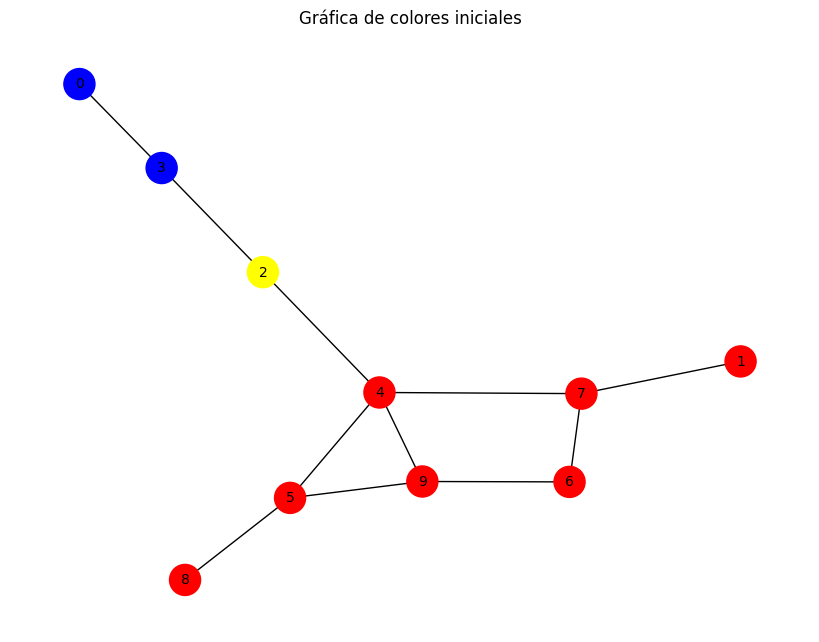

In [83]:
H = connected_graph(n_vertices)
H = initial_colors(H)
draw_graph(H, "Gráfica de colores iniciales")

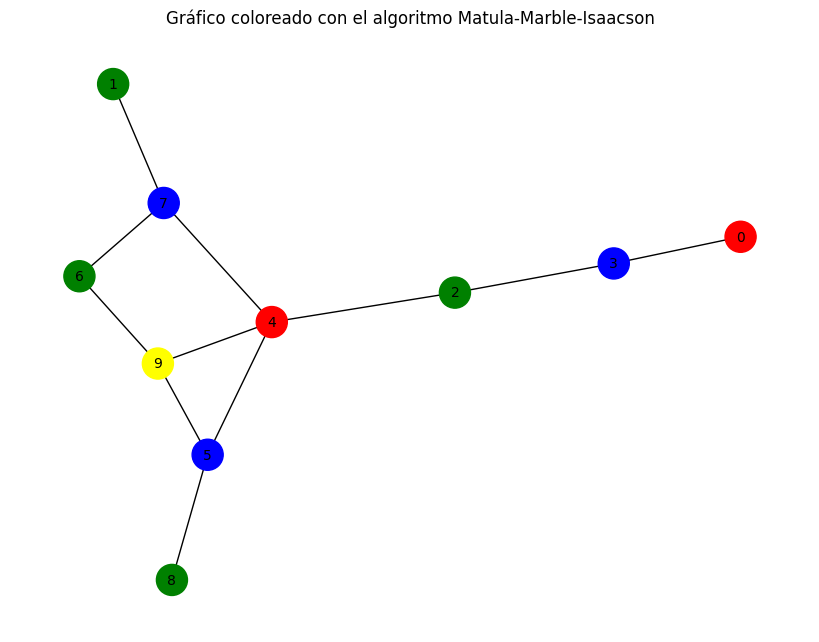

In [84]:
# Aplica el algoritmo Matula-Marble-Isaacson al grafo
H = matula_marble_isaacson_algorithm(
    H.copy())
draw_graph(H,
           "Gráfico coloreado con el algoritmo Matula-Marble-Isaacson")

In [85]:
# Tabla 2: Grados de los vértices de coloración Matula, Marble, Isaacson
table_matula_marble = create_degree_table(
    H, reverse_order=False)
print(table_matula_marble)

+-----------+---------+
| Vértice   | Grado   |
+===========+=========+
| Vértice 0 | Grado 1 |
+-----------+---------+
| Vértice 1 | Grado 1 |
+-----------+---------+
| Vértice 8 | Grado 1 |
+-----------+---------+
| Vértice 2 | Grado 2 |
+-----------+---------+
| Vértice 3 | Grado 2 |
+-----------+---------+
| Vértice 6 | Grado 2 |
+-----------+---------+
| Vértice 5 | Grado 3 |
+-----------+---------+
| Vértice 7 | Grado 3 |
+-----------+---------+
| Vértice 9 | Grado 3 |
+-----------+---------+
| Vértice 4 | Grado 4 |
+-----------+---------+
